# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


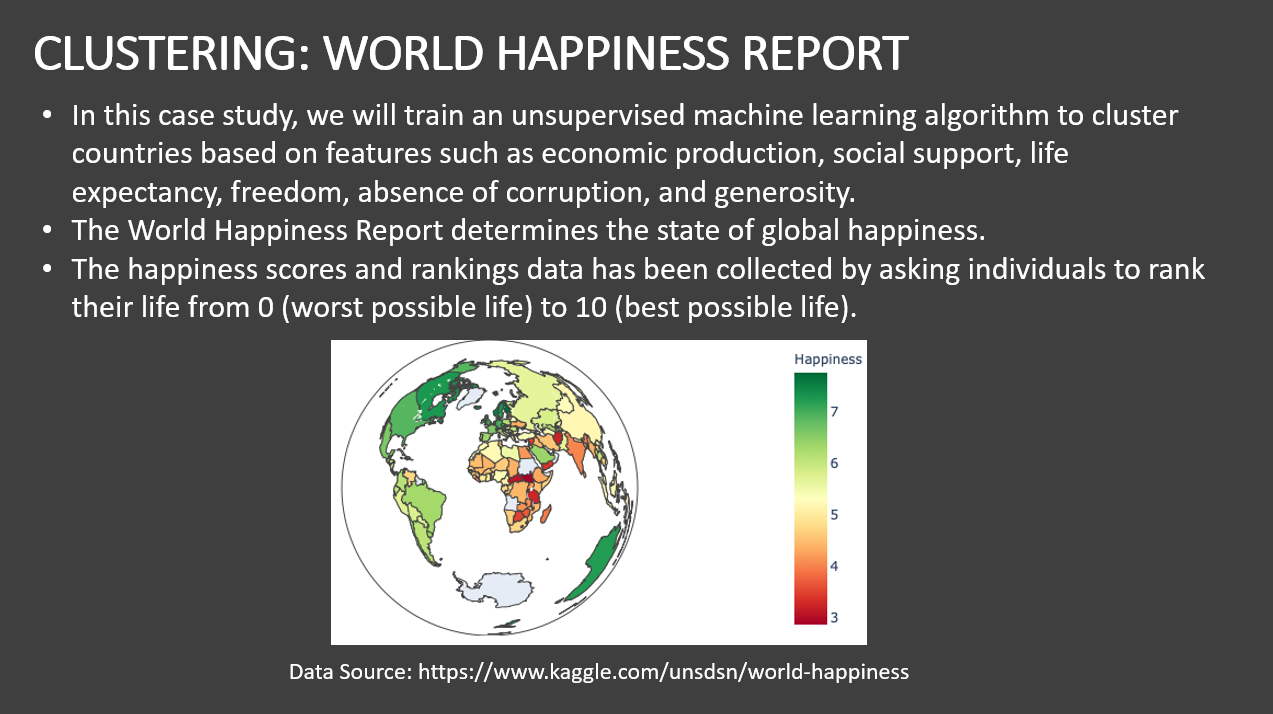

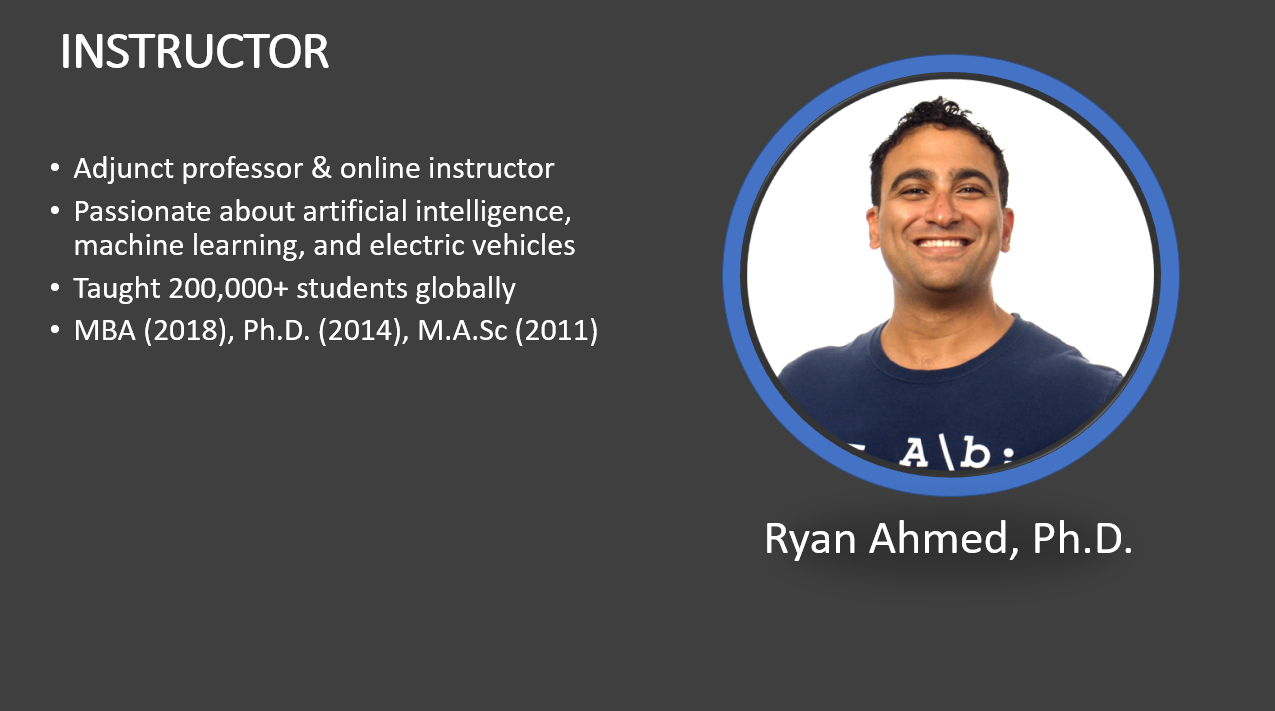

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
# Get the required dependencies
! pip install bubbly
#! pip install iplot ##iplot installed ahead from the plotly package
! pip install chart_studio


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [4]:
# Import csv file into pandas dataframe
happy_df=pd.read_csv('happiness_report.csv')

In [5]:
# print the first 5 rows of the dataframe
happy_df.head(5)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

MINI CHALLENGE #1: 
- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check. 

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
# Check the number of non-null values in the dataframe
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
# Check Null values
happy_df.isnull()

Overall rank  Country or region  Score  GDP per capita  Social support  \
0           False              False  False           False           False   
1           False              False  False           False           False   
2           False              False  False           False           False   
3           False              False  False           False           False   
4           False              False  False           False           False   
..            ...                ...    ...             ...             ...   
151         False              False  False           False           False   
152         False              False  False           False           False   
153         False              False  False           False           False   
154         False              False  False           False           False   
155         False              False  False           False           False   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      False                         False       False   
1                      False                         False       False   
2                      False                         False       False   
3                      False                         False       False   
4                      False                         False       False   
..                       ...                           ...         ...   
151                    False                         False       False   
152                    False                         False       False   
153                    False                         False       False   
154                    False                         False       False   
155                    False                         False       False   

     Perceptions of corruption  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
..                         ...  
151                      False  
152                      False  
153                      False  
154                      False  
155                      False  

[156 rows x 9 columns]

In [8]:
# Obtain the Statistical summary of the dataframe
happy_df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [9]:
# check the number of duplicated entries in the dataframe
 # since there are no duplicates, no further action is required
print("\nNumber of duplicated entries in happy_df:")
num_duplicates = happy_df.duplicated().sum()
print(num_duplicates)

if num_duplicates == 0:
        print("Since there are no duplicates, no further action is required regarding duplicate removal.")
else:
        print(f"There are {num_duplicates} duplicate entries. Consider using happy_df.drop_duplicates(inplace=True) to remove them.")


Number of duplicated entries in happy_df:
0
Since there are no duplicates, no further action is required regarding duplicate removal.


MINI CHALLENGE #2:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [10]:
happy_df.max()

Overall rank                         156
Country or region               Zimbabwe
Score                              7.769
GDP per capita                     1.684
Social support                     1.624
Healthy life expectancy            1.141
Freedom to make life choices       0.631
Generosity                         0.566
Perceptions of corruption          0.453
dtype: object

# TASK #4: PERFORM DATA VISUALIZATION - PART #1

In [11]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))

# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


<Figure size 2000x2000 with 0 Axes>

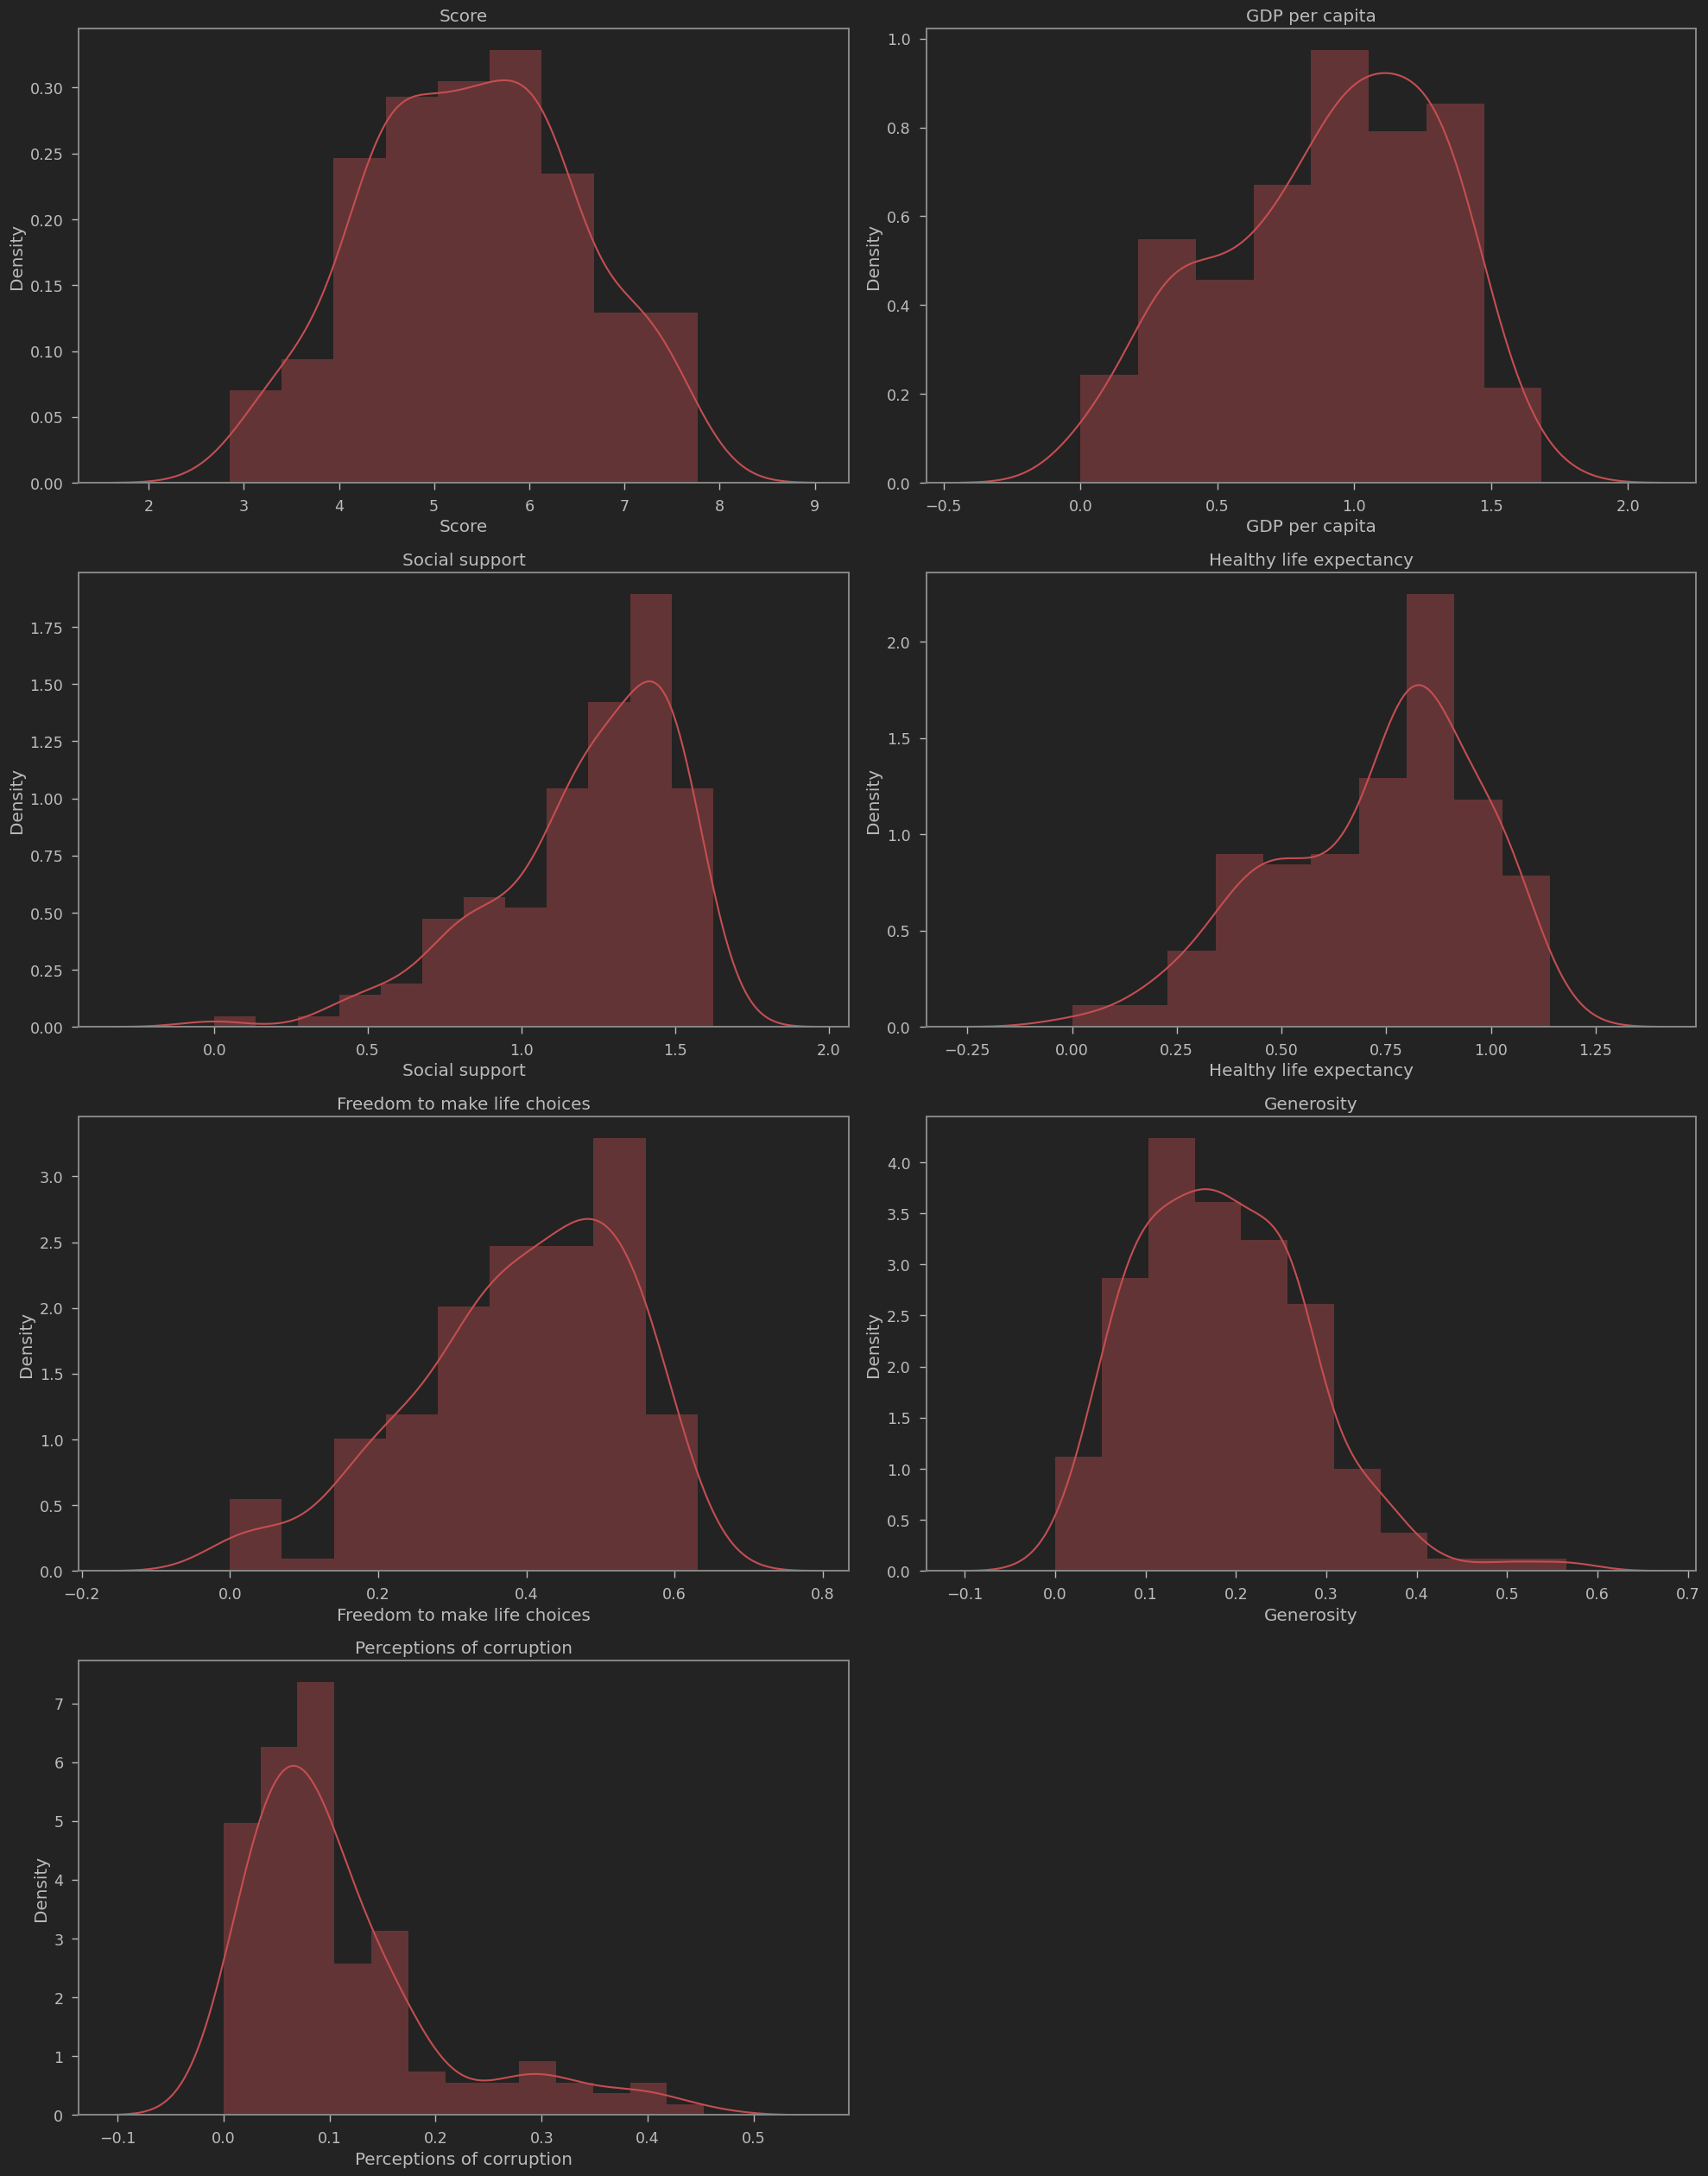

In [12]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(happy_df[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

MINI CHALLENGE #3:
- Plot the correlation matrix and comment on the results. 


In [13]:
corr_matrix=happy_df.corr()
corr_matrix

Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   -0.801947  0.793883        1.000000   
Social support                   -0.767465  0.777058        0.754906   
Healthy life expectancy          -0.787411  0.779883        0.835462   
Freedom to make life choices     -0.546606  0.566742        0.379079   
Generosity                       -0.047993  0.075824       -0.079662   
Perceptions of corruption        -0.351959  0.385613        0.298920   

                              Social support  Healthy life expectancy  \
Overall rank                       -0.767465                -0.787411   
Score                               0.777058                 0.779883   
GDP per capita                      0.754906                 0.835462   
Social support                      1.000000                 0.719009   
Healthy life expectancy             0.719009                 1.000000   
Freedom to make life choices        0.447333                 0.390395   
Generosity                         -0.048126                -0.029511   
Perceptions of corruption           0.181899                 0.295283   

                              Freedom to make life choices  Generosity  \
Overall rank                                     -0.546606   -0.047993   
Score                                             0.566742    0.075824   
GDP per capita                                    0.379079   -0.079662   
Social support                                    0.447333   -0.048126   
Healthy life expectancy                           0.390395   -0.029511   
Freedom to make life choices                      1.000000    0.269742   
Generosity                                        0.269742    1.000000   
Perceptions of corruption                         0.438843    0.326538   

                              Perceptions of corruption  
Overall rank                                  -0.351959  
Score                                          0.385613  
GDP per capita                                 0.298920  
Social support                                 0.181899  
Healthy life expectancy                        0.295283  
Freedom to make life choices                   0.438843  
Generosity                                     0.326538  
Perceptions of corruption                      1.000000

<AxesSubplot: >

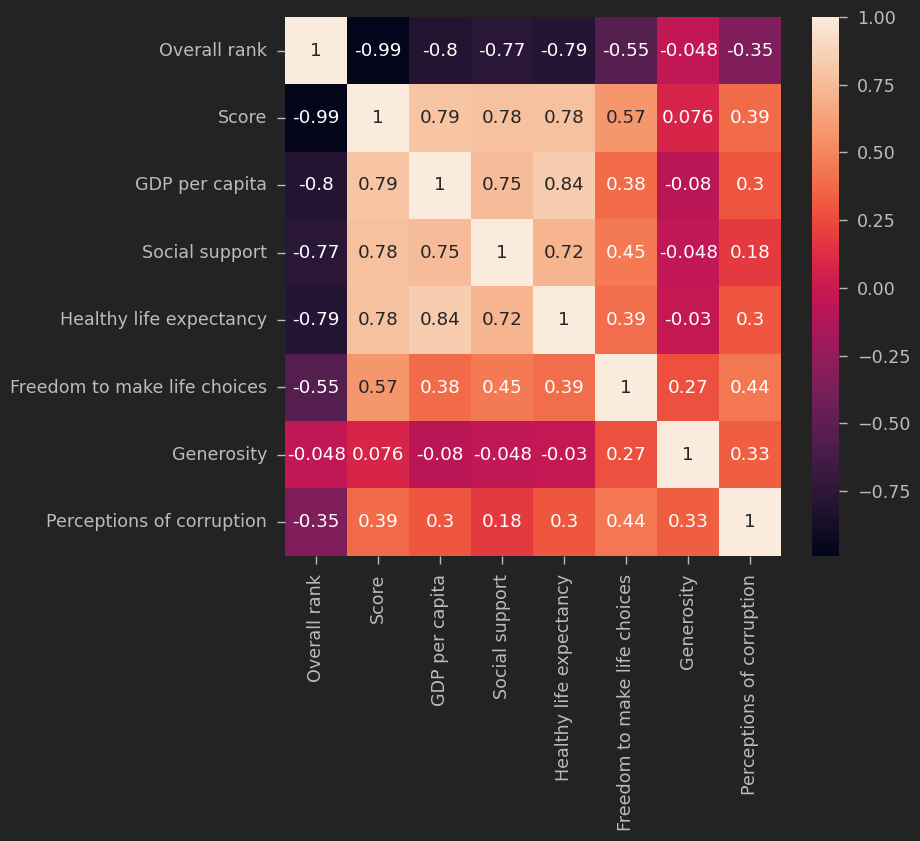

In [14]:
sns.heatmap(corr_matrix,annot=True)

# TASK #5: PERFORM DATA VISUALIZATION - PART #2

In [15]:
# Plot the relationship between score, GDP and region
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score')
fig.show()

In [16]:
# Plot the relationship between score and GDP (while adding color and size)

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [17]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4: 
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

In [22]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Healthy life expectancy'
)
fig.show()

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [18]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [24]:
# Select the data without rank and happiness score
df_seg=happy_df.drop(columns=['Overall rank','Country or region','Score'])
df_seg

GDP per capita  Social support  Healthy life expectancy  \
0             1.340           1.587                    0.986   
1             1.383           1.573                    0.996   
2             1.488           1.582                    1.028   
3             1.380           1.624                    1.026   
4             1.396           1.522                    0.999   
..              ...             ...                      ...   
151           0.359           0.711                    0.614   
152           0.476           0.885                    0.499   
153           0.350           0.517                    0.361   
154           0.026           0.000                    0.105   
155           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596       0.153                      0.393  
1                           0.592       0.252                      0.410  
2                           0.603       0.271                      0.341  
3                           0.591       0.354                      0.118  
4                           0.557       0.322                      0.298  
..                            ...         ...                        ...  
151                         0.555       0.217                      0.411  
152                         0.417       0.276                      0.147  
153                         0.000       0.158                      0.025  
154                         0.225       0.235                      0.035  
155                         0.010       0.202                      0.091  

[156 rows x 6 columns]

In [26]:
# Scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_seg)

In [28]:
scaled_data.shape

(156, 6)

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING ALGORITHM

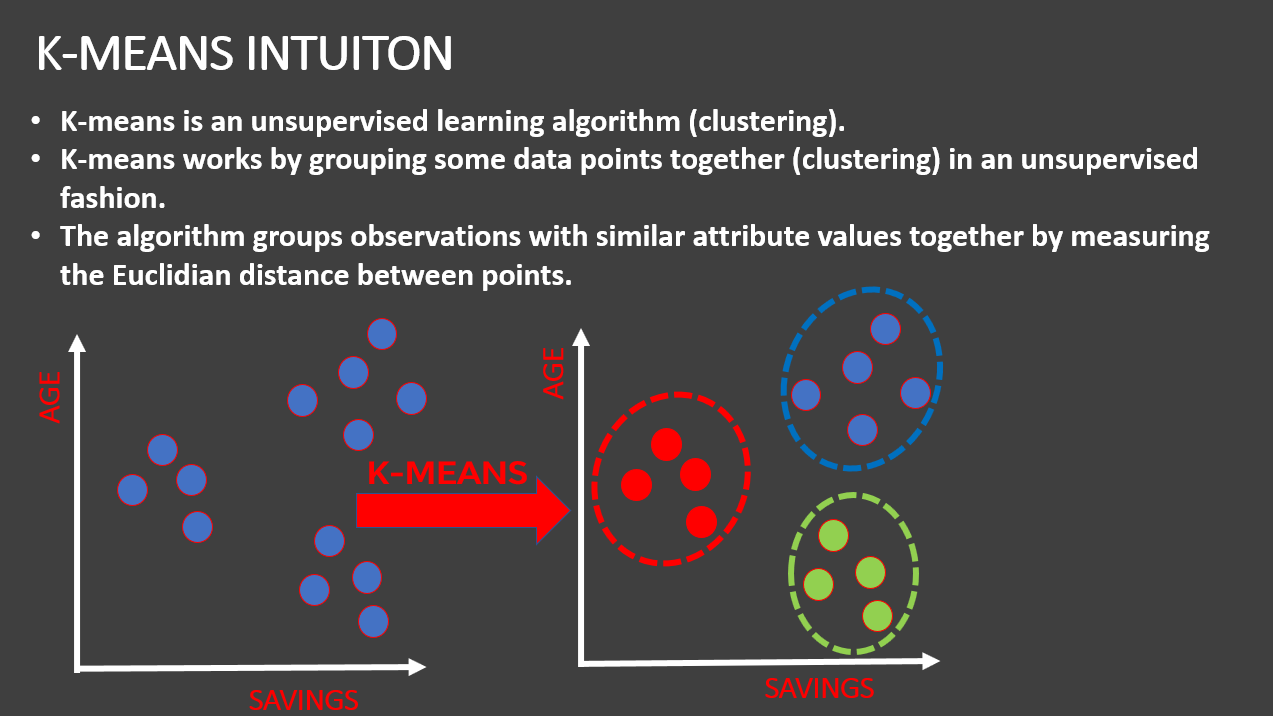

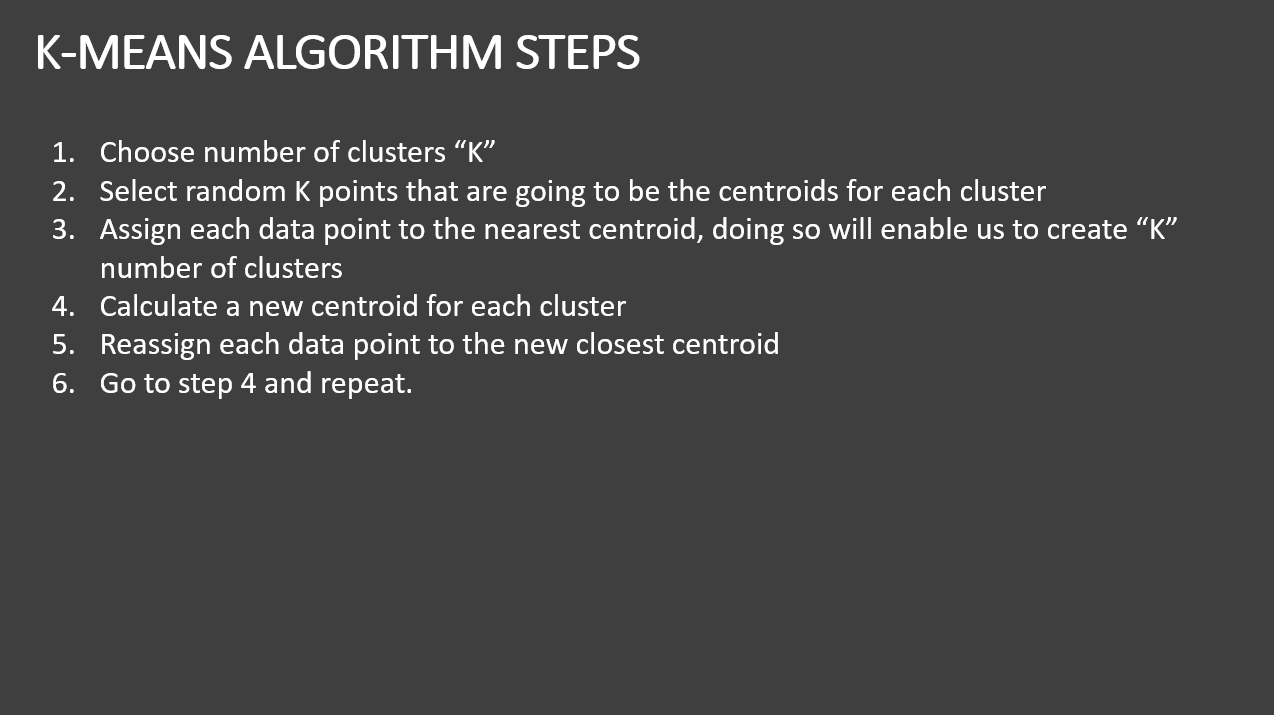

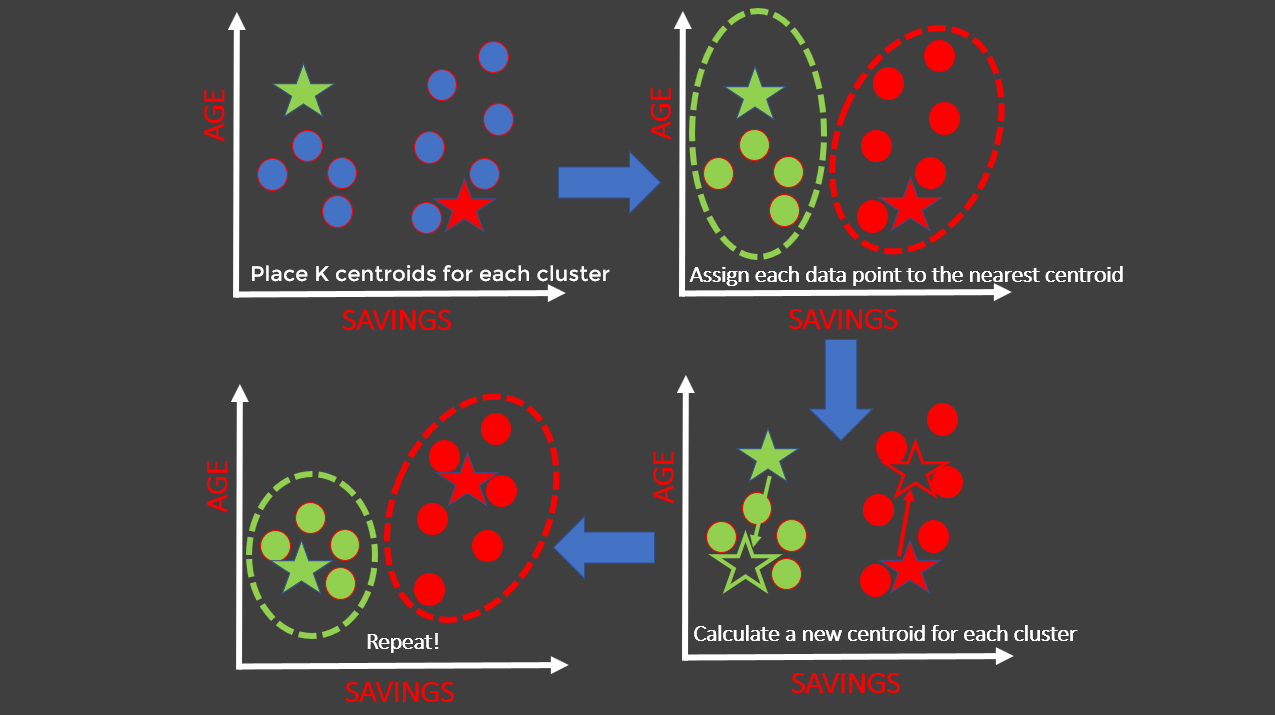

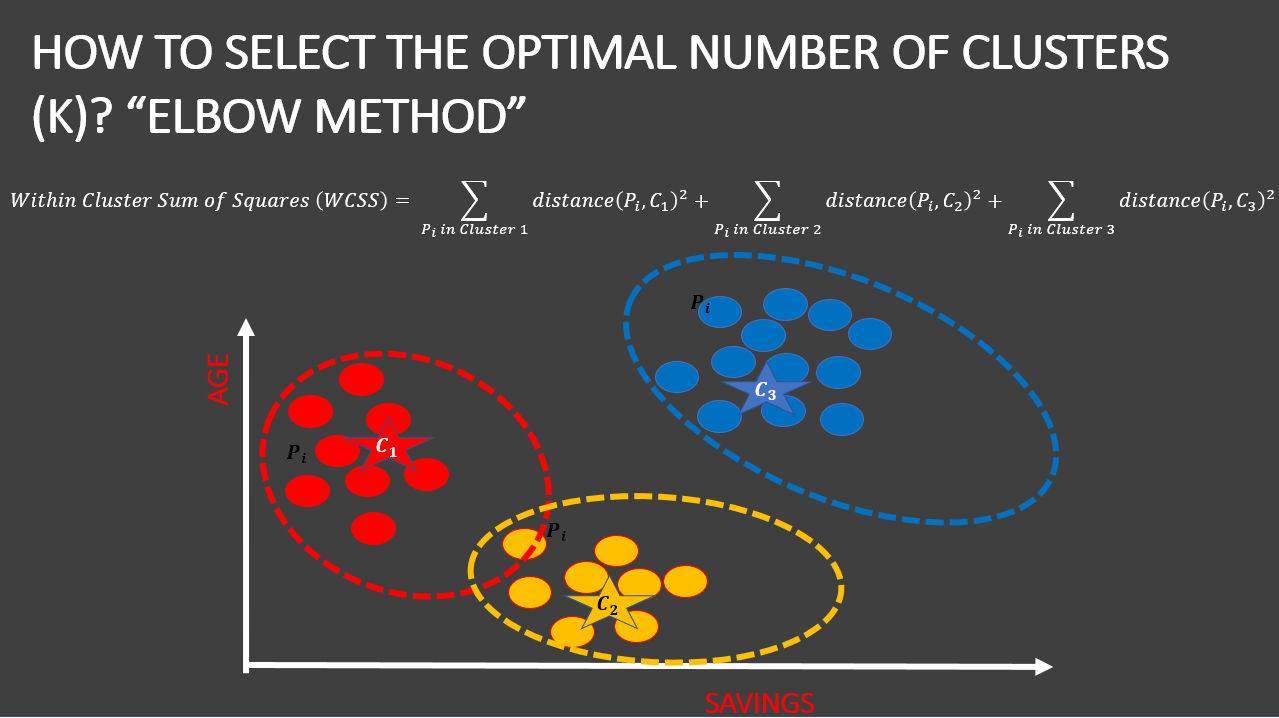

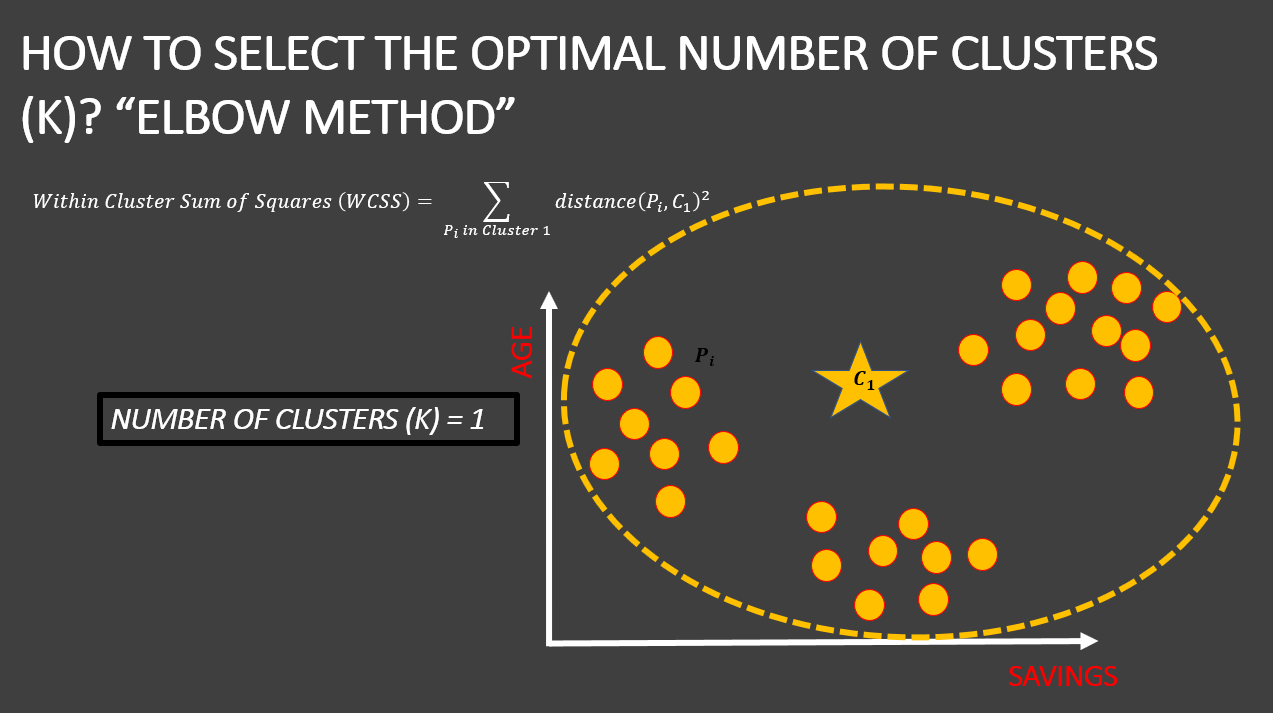

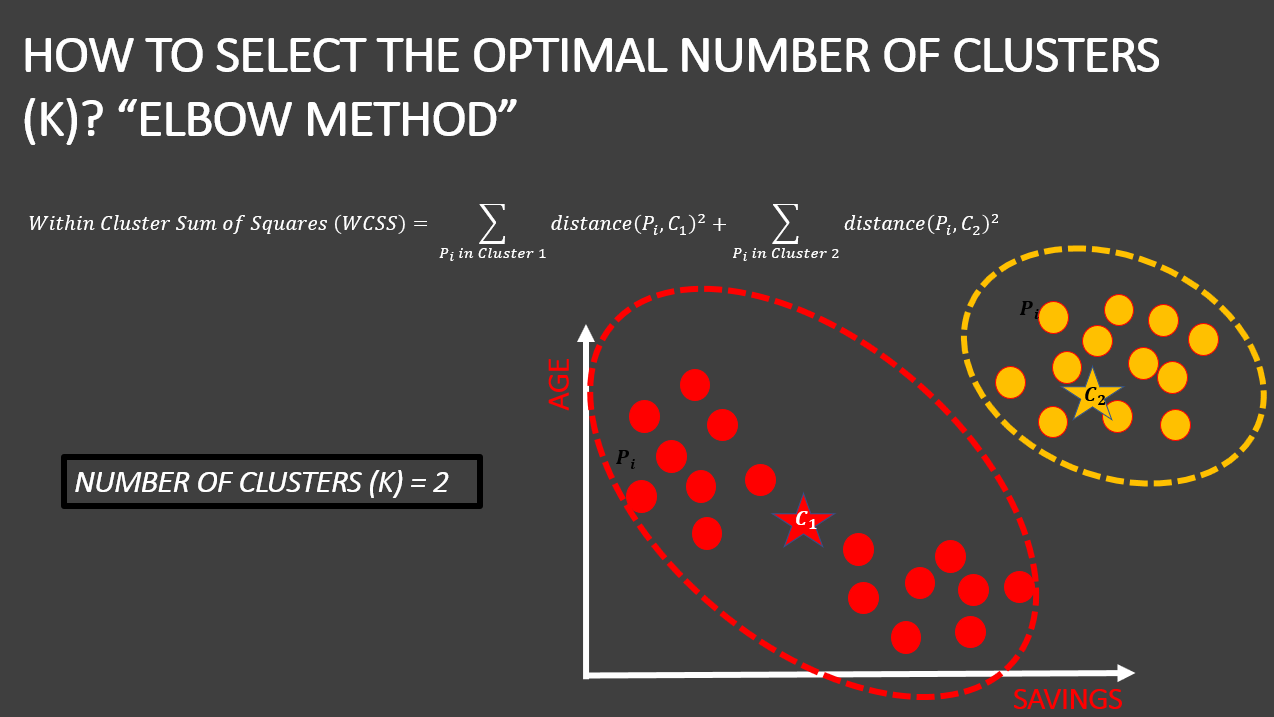

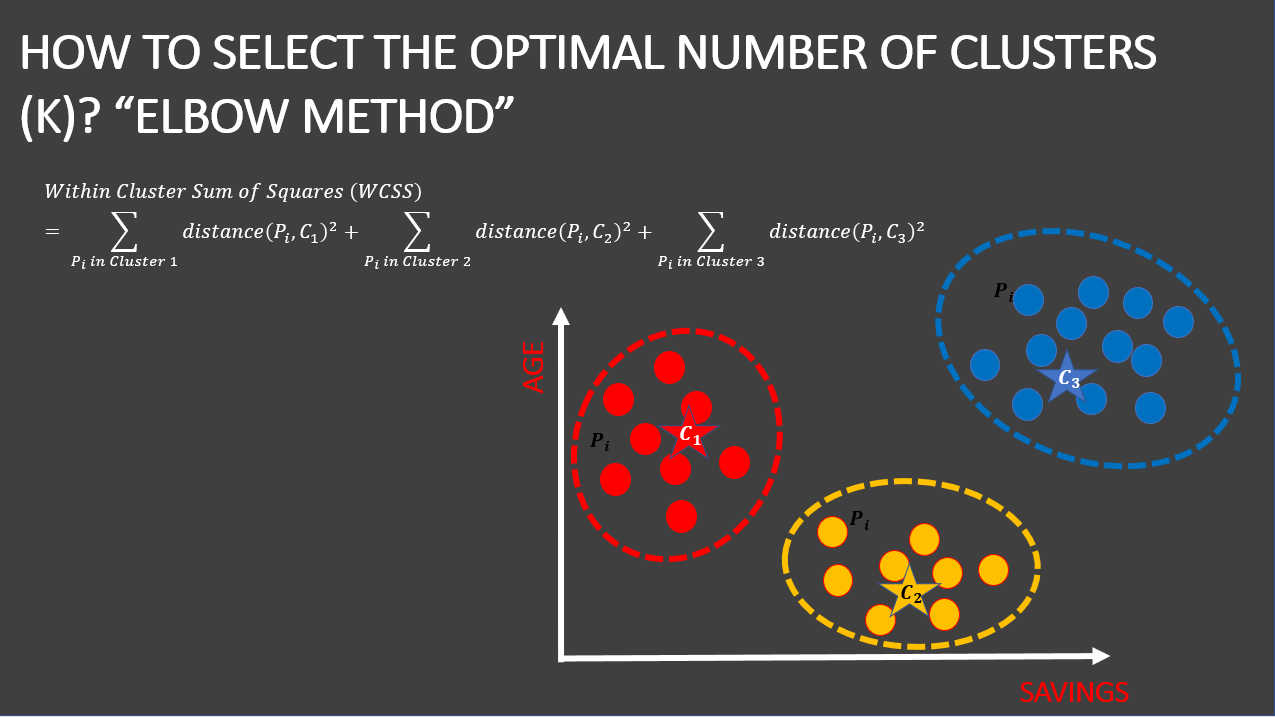

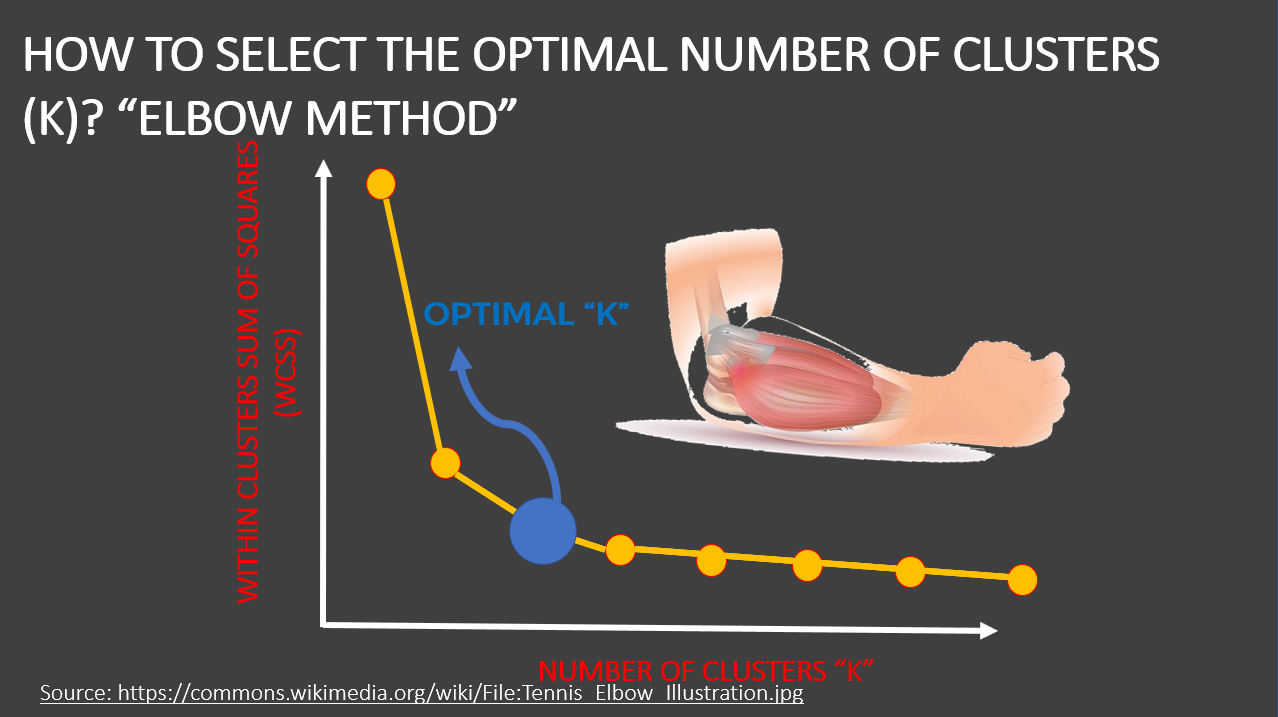

# TASK #8: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

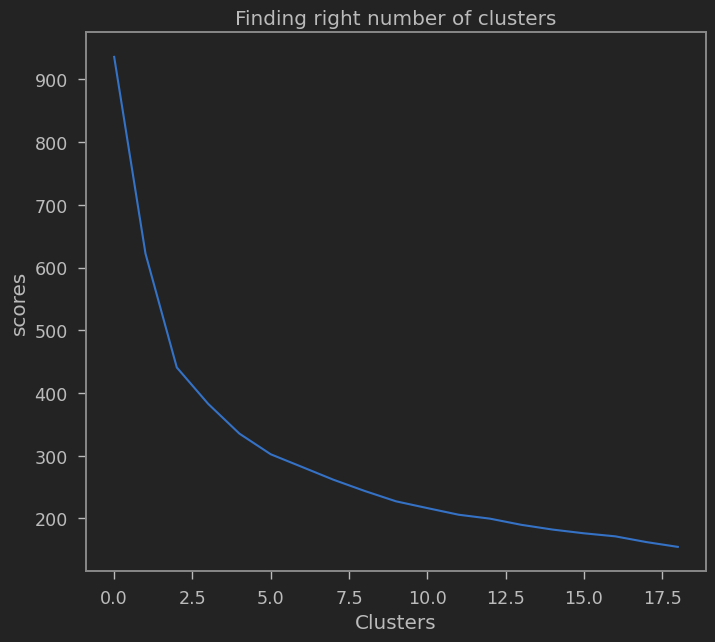

In [33]:
scores=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve. 
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [34]:
kmeans=KMeans(3)
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [36]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [37]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers      

GDP per capita Social support Healthy life expectancy  \
0       1.044048       0.840457                0.886718   
1      -1.264229      -1.132144               -1.240341   
2       0.352697       0.348120                0.393020   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     1.043959   1.201517                  1.468652  
1                    -0.471563   0.260570                 -0.114358  
2                    -0.091938  -0.556448                 -0.437339

In [38]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


GDP per capita Social support Healthy life expectancy  \
0       1.319750       1.459464                0.939250   
1       0.403109       0.871174                0.425891   
2       1.045207       1.312634                0.820098   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     0.541679   0.298929                  0.249000  
1                     0.325217   0.209587                  0.099826  
2                     0.379439   0.132012                  0.069390

- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [45]:
cluster_centers.shape # Labels associated to each data point

(3, 6)

In [46]:
cluster_centers.max()

GDP per capita                  1.319750
Social support                  1.459464
Healthy life expectancy         0.939250
Freedom to make life choices    0.541679
Generosity                      0.298929
Perceptions of corruption       0.249000
dtype: float64

In [47]:
cluster_centers.min()

GDP per capita                  0.403109
Social support                  0.871174
Healthy life expectancy         0.425891
Freedom to make life choices    0.325217
Generosity                      0.132012
Perceptions of corruption       0.069390
dtype: float64

In [48]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [54]:
# concatenate the clusters labels to our original dataframe
# Assuming 'kmeans' is your fitted KMeans model object.
# Use the .labels_ attribute to get the cluster assignments (a 1D numpy array).
cluster_labels = kmeans.labels_

# Create a new DataFrame using the labels, ensuring it uses the same index as happy_df
# by passing happy_df.index explicitly.
cluster_df = pd.DataFrame({'cluster': cluster_labels}, index=happy_df.index)

# Concatenate the original dataframe with the new cluster labels dataframe
happy_df_cluster = pd.concat([happy_df, cluster_df], axis=1)

# Display the result
happy_df_cluster


Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  cluster  
0         0.153                      0.393        0  
1         0.252                      0.410        0  
2         0.271                      0.341        0  
3         0.354                      0.118        0  
4         0.322                      0.298        0  
..          ...                        ...      ...  
151       0.217                      0.411        1  
152       0.276                      0.147        1  
153       0.158                      0.025        1  
154       0.235                      0.035        1  
155       0.202                      0.091        1  

[156 rows x 10 columns]

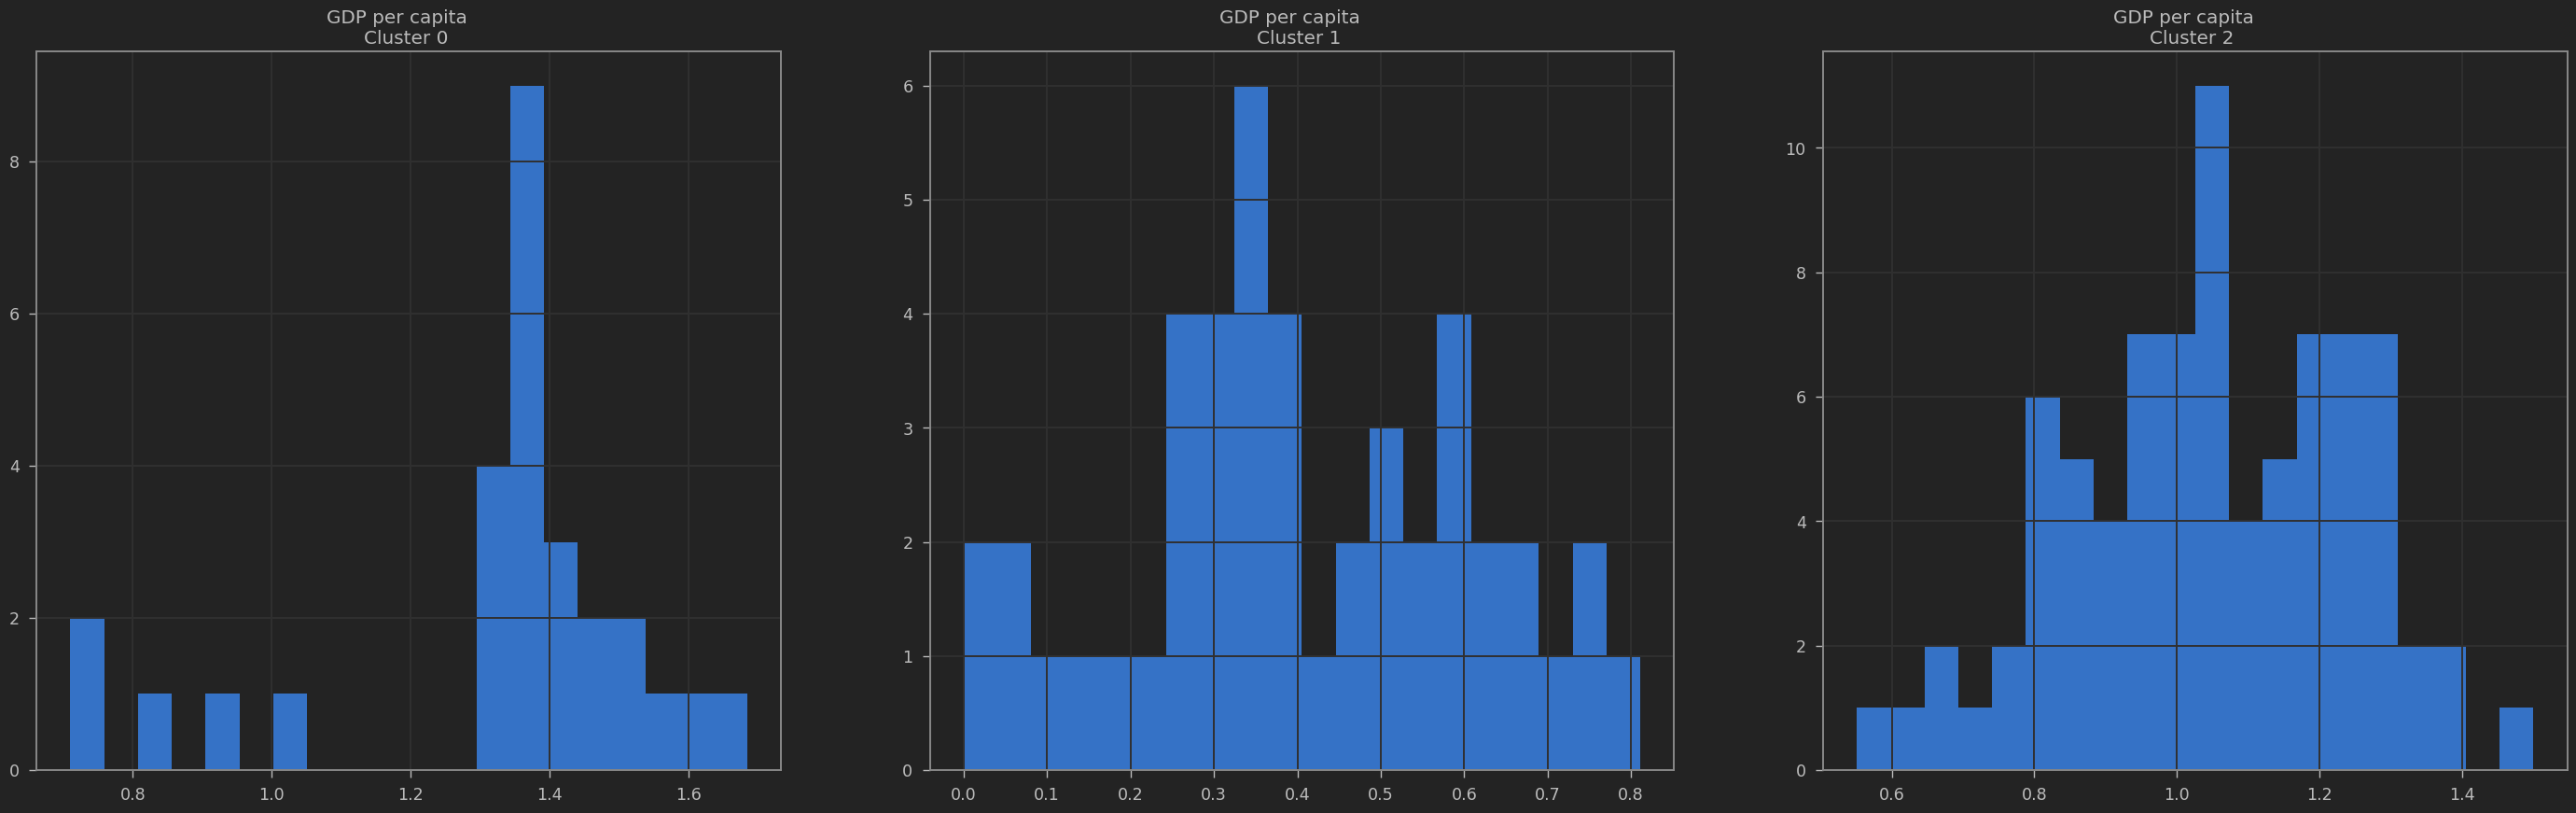

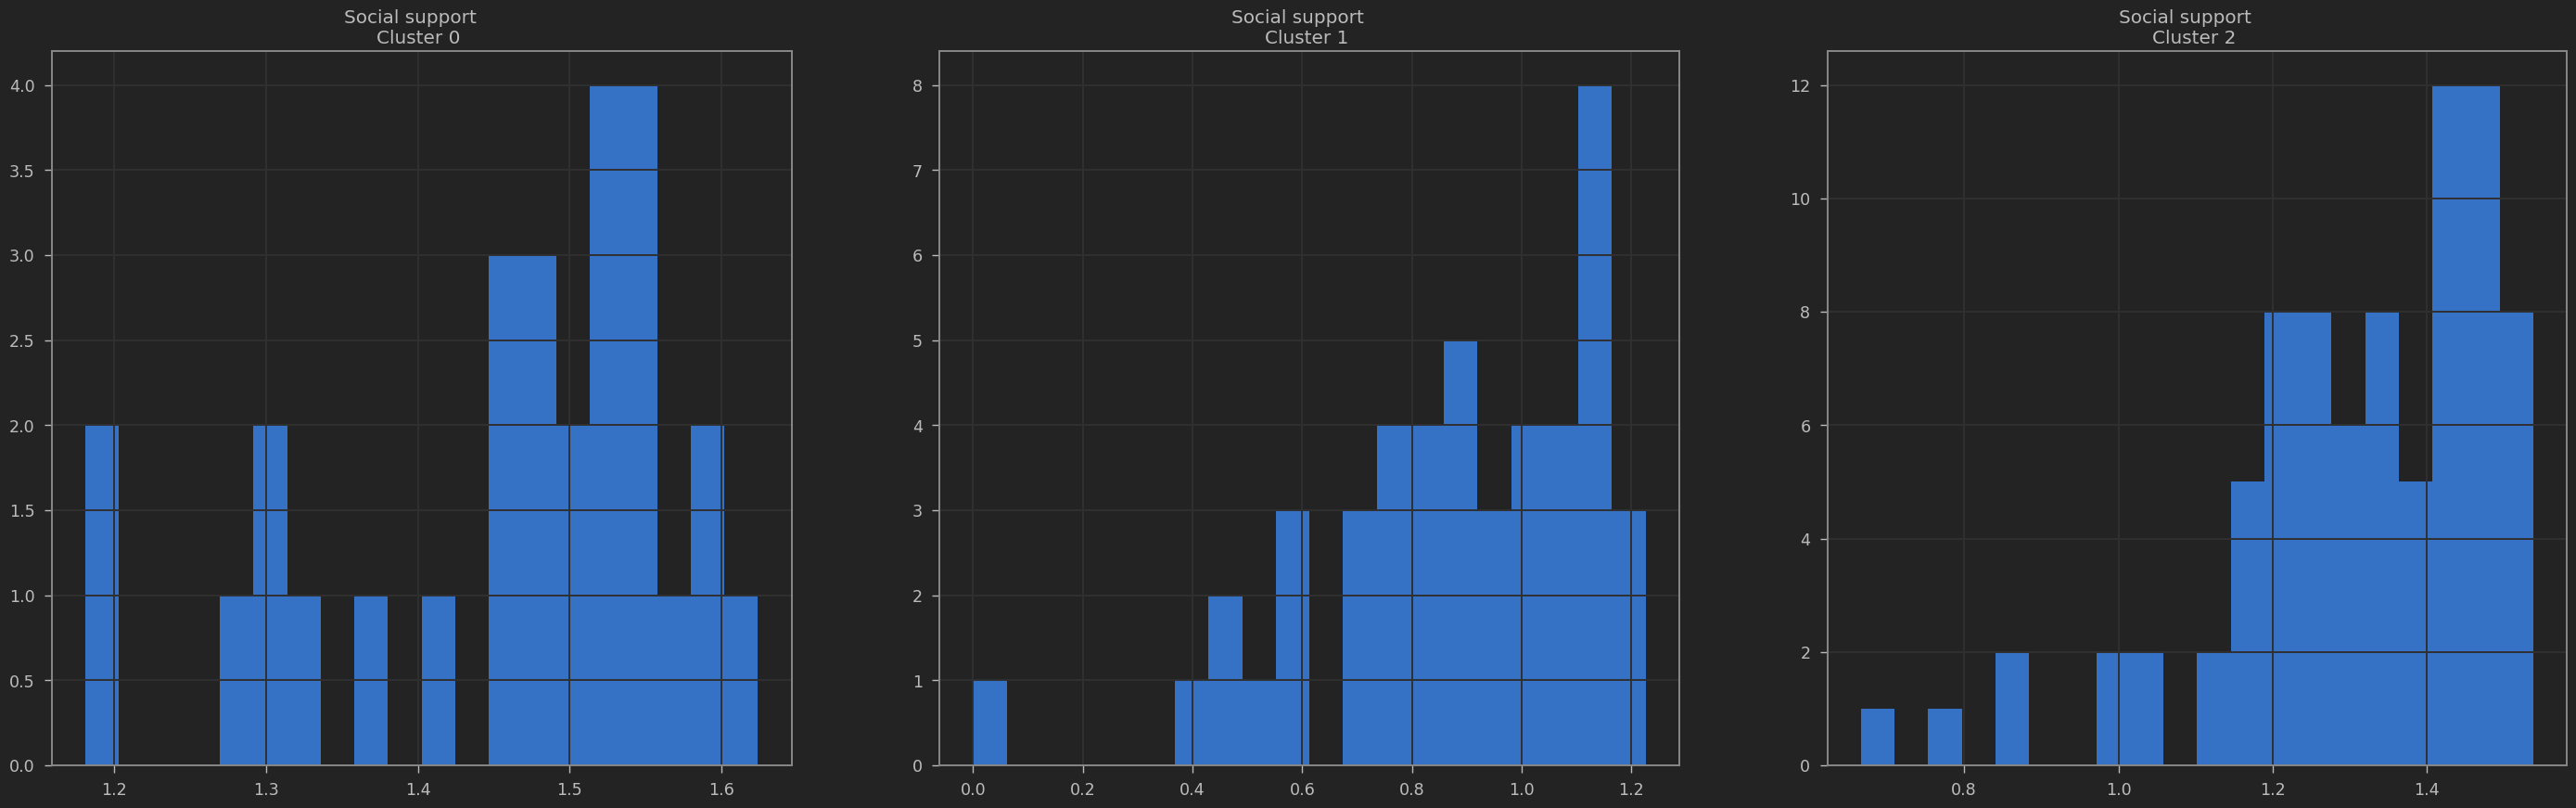

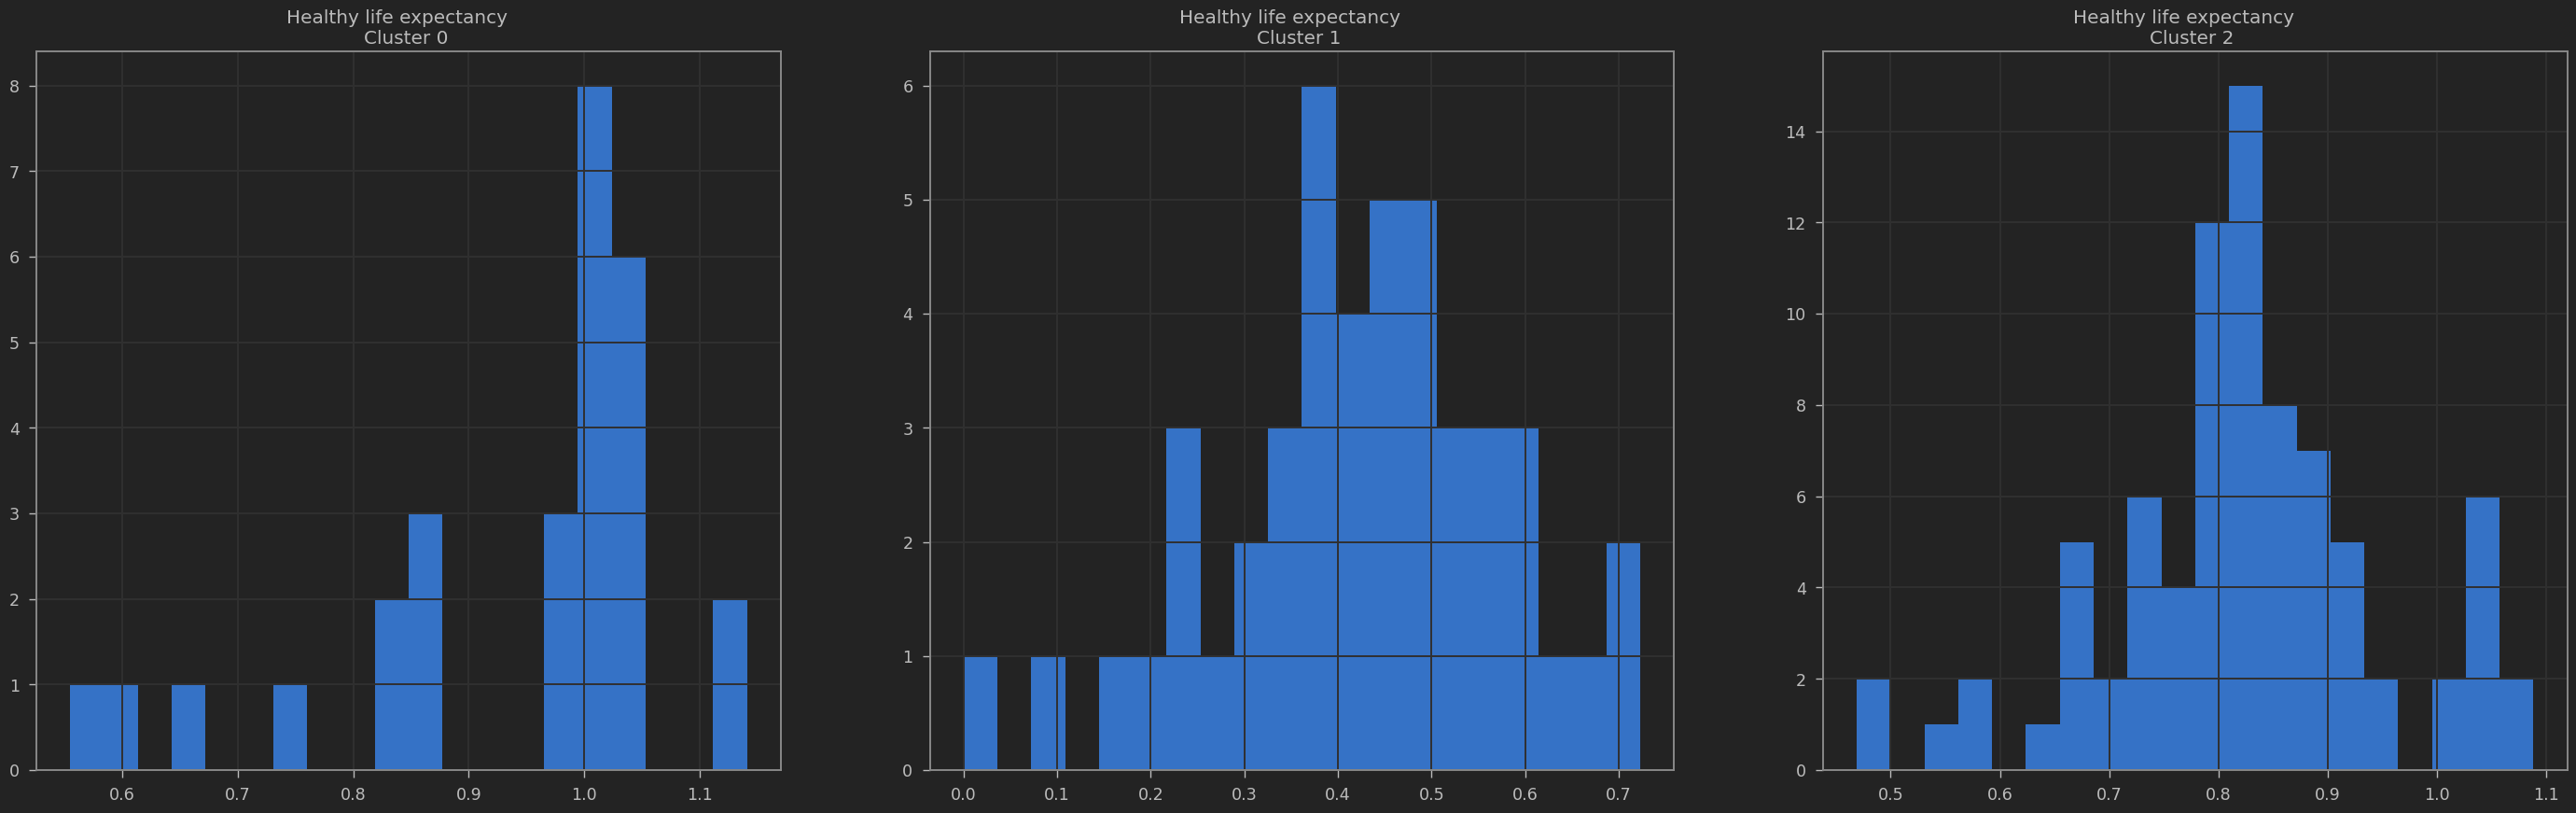

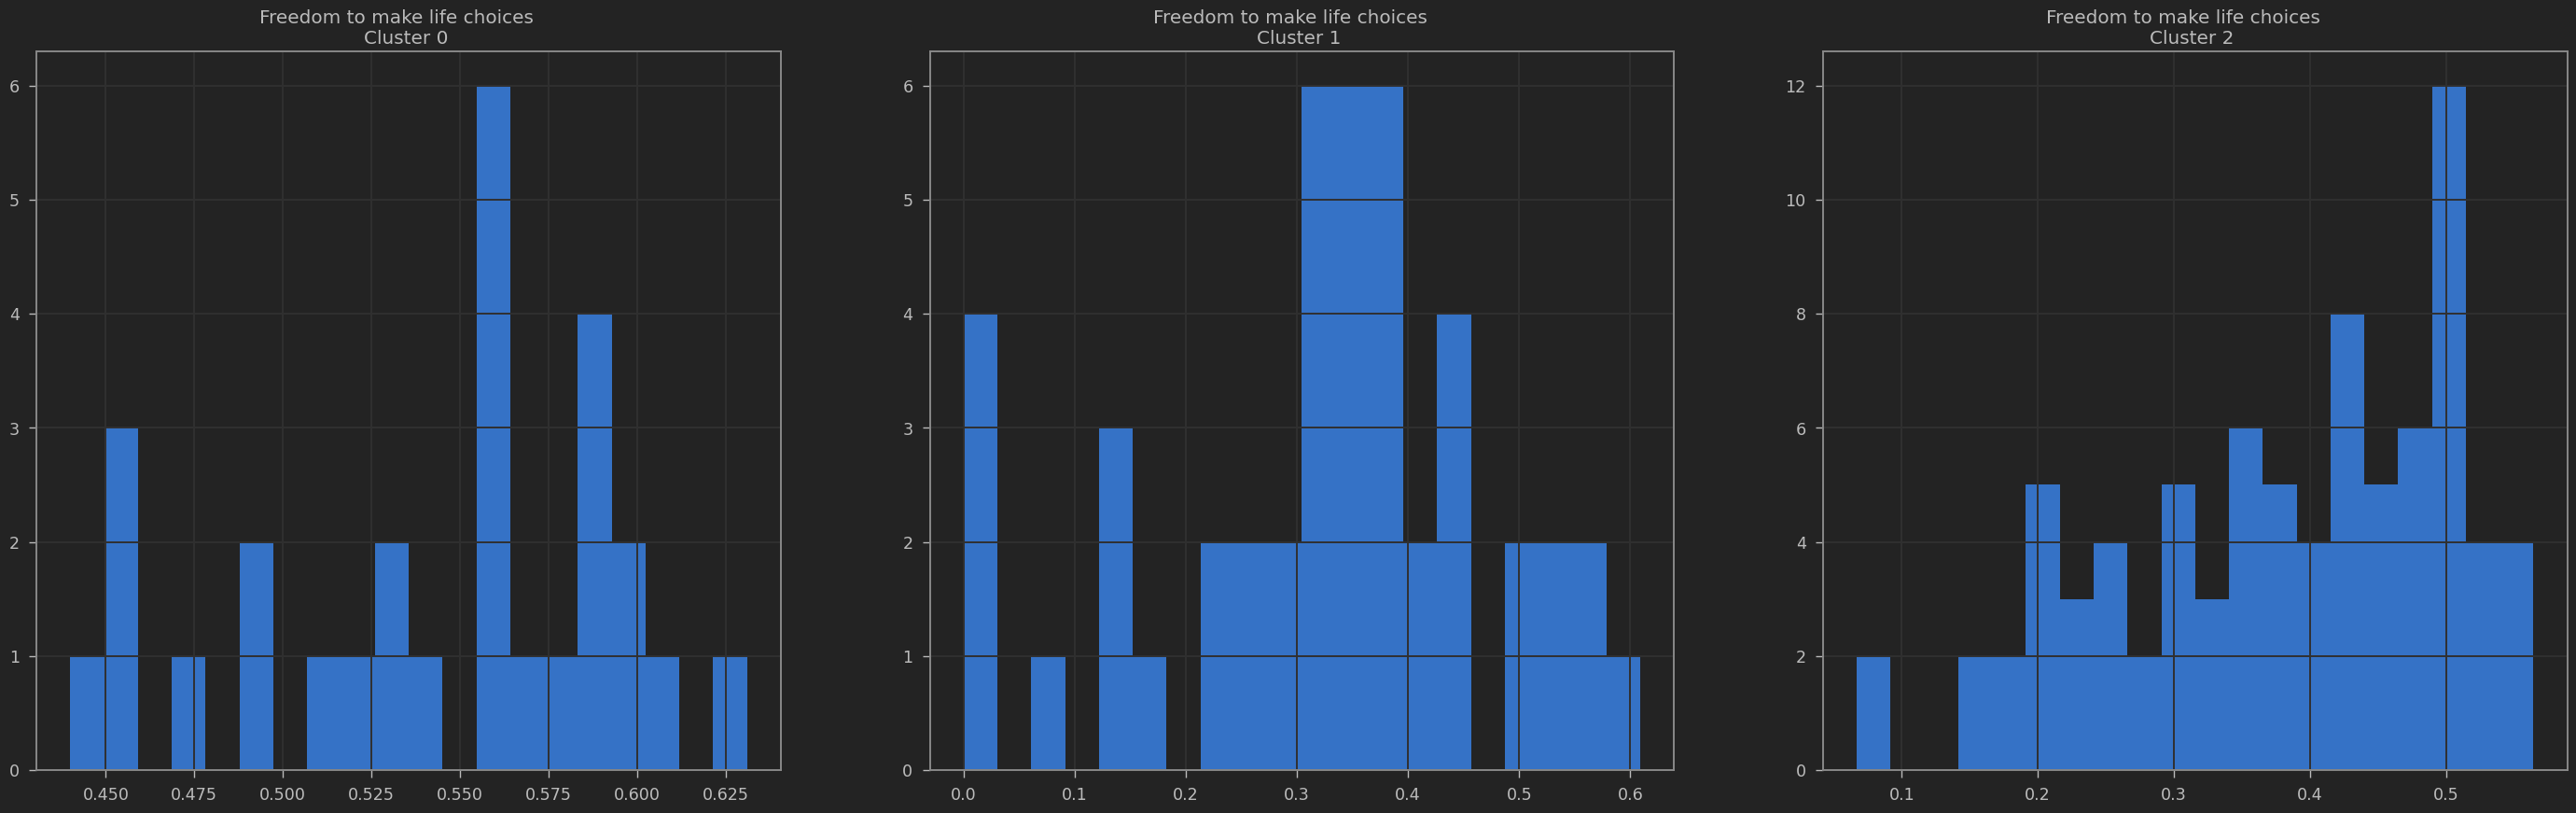

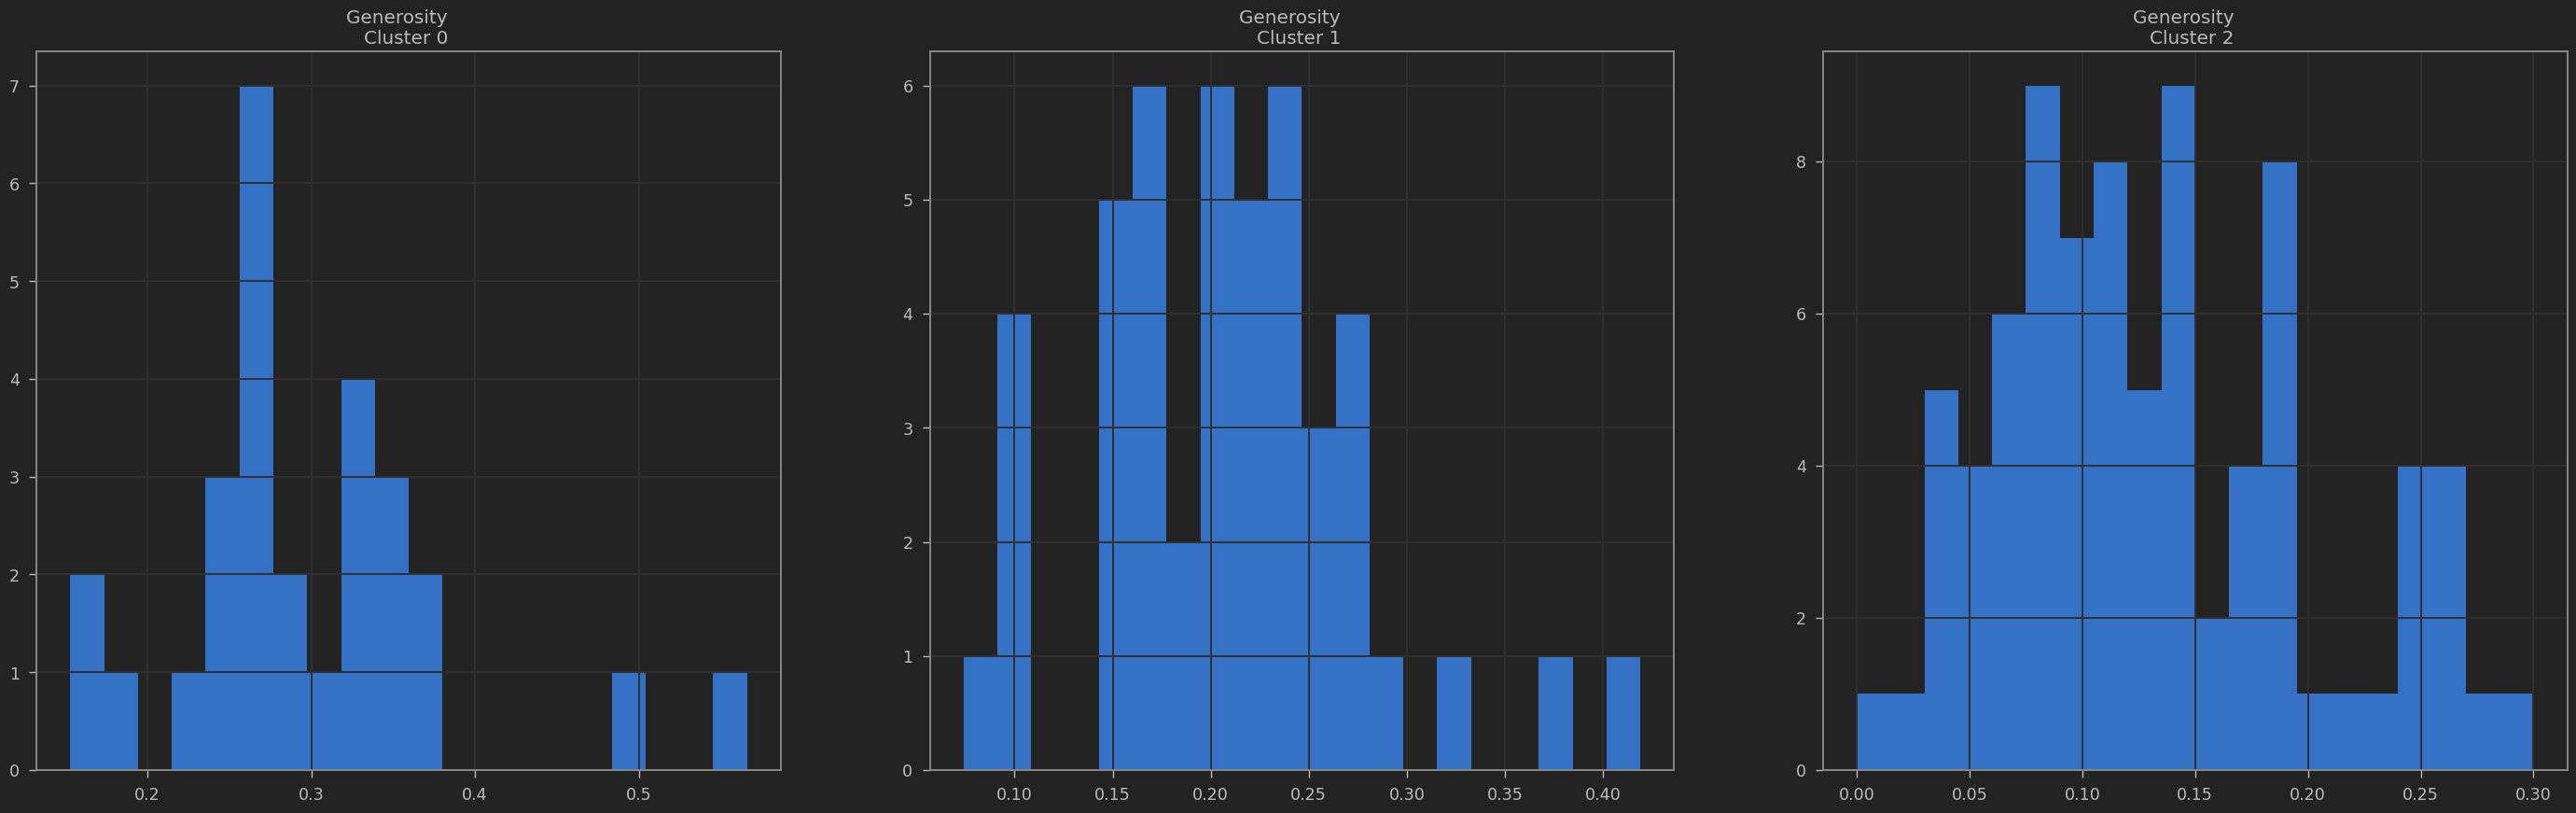

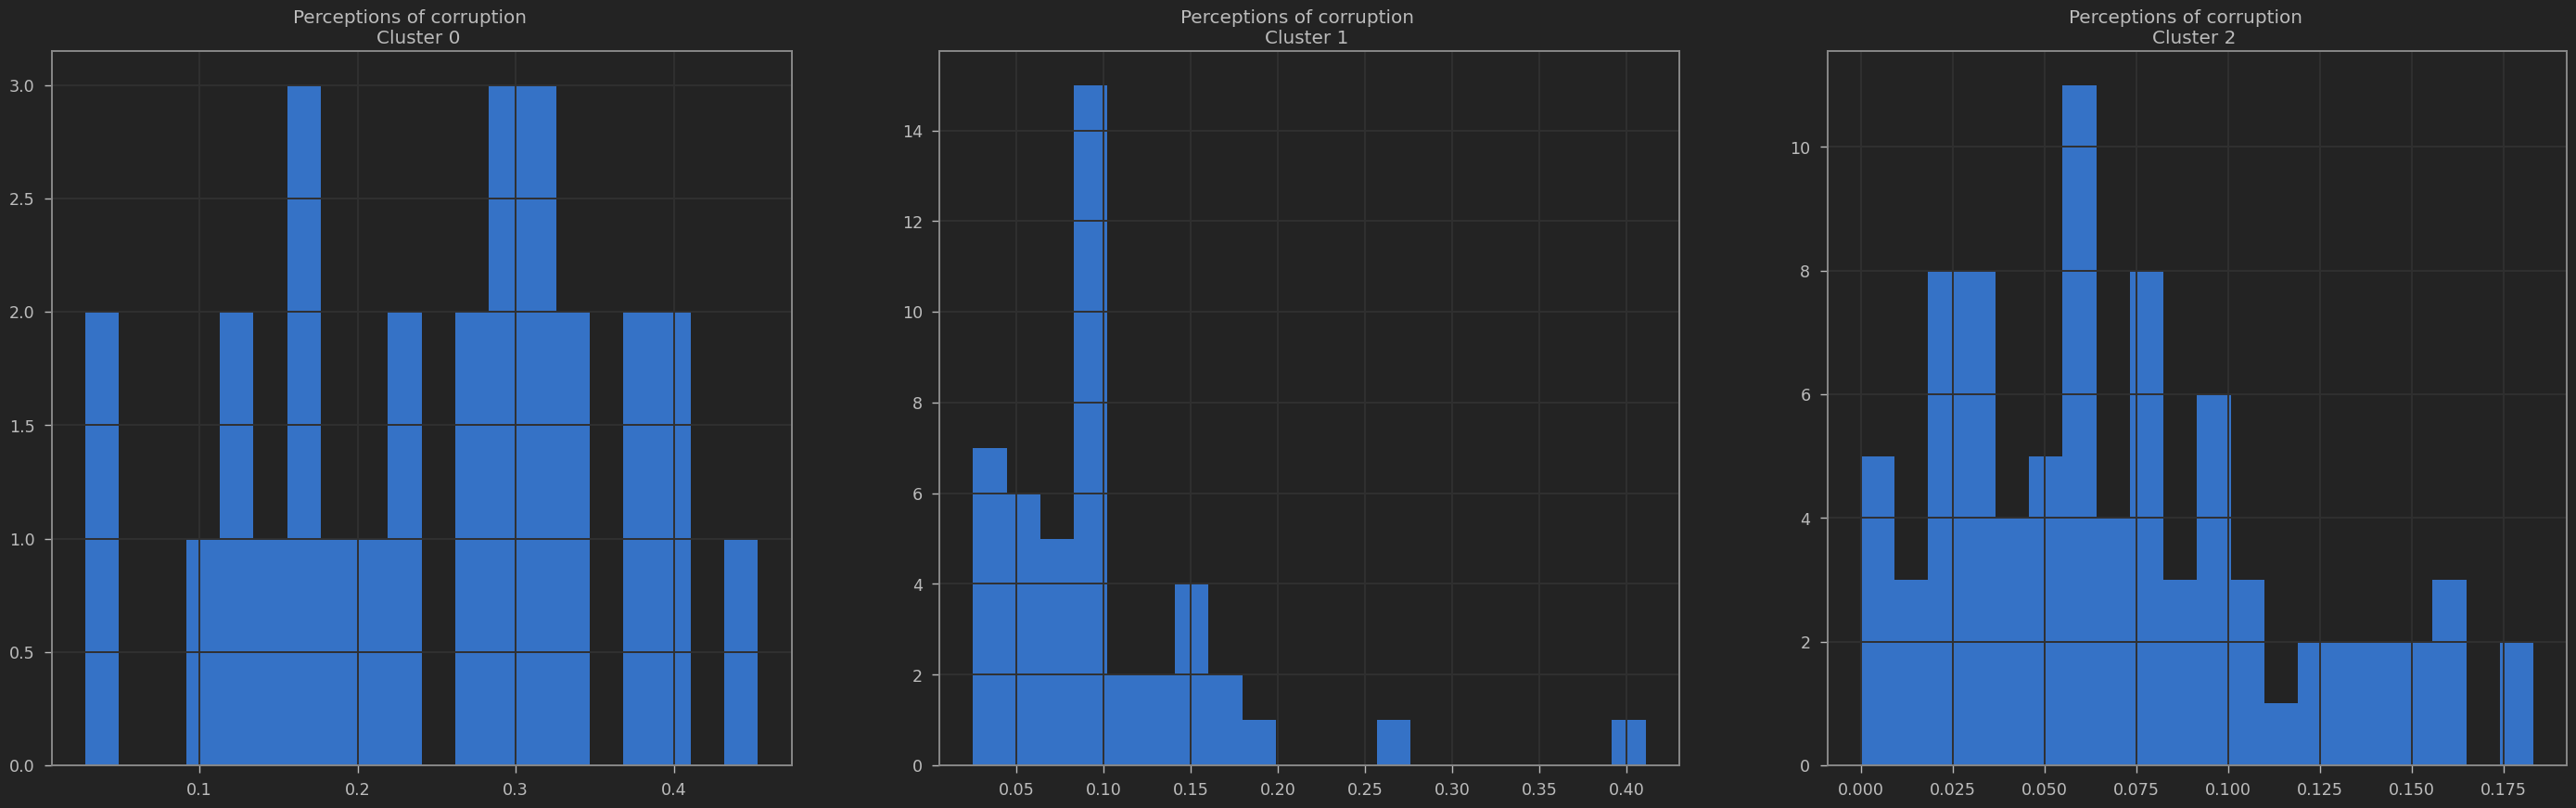

In [55]:
# Plot the histogram of various clusters
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



MINI CHALLENGE #5:
- Try the same model with 4 clusters 

In [56]:
kmeans=KMeans(4)
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

# TASK #10: VISUALIZE THE CLUSTERS

In [57]:
# Plot the relationship between cluster and score 

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [59]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [61]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Healthy life expectancy', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

MINI CHALLENGE #6:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [62]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'], 
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# GREAT JOB!

MINI CHALLENGE #1 SOLUTION: 
- Find out how many samples exist in the DataFrame using two different methods
- Select your own country from the dataframe and explore scores. Perform sanity check. 

In [63]:
len(happy_df)

156

In [64]:
happy_df

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

In [65]:
happy_df[happy_df['Country or region']=='Canada']

Overall rank Country or region  Score  GDP per capita  Social support  \
8             9            Canada  7.278           1.365           1.505   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
8                    1.039                         0.584       0.285   

   Perceptions of corruption  
8                      0.308

MINI CHALLENGE #2 SOLUTION:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [66]:
happy_df[happy_df['Score'] == 7.769000]

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

MINI CHALLENGE #3 SOLUTION:
- Plot the correlation matrix and comment on the results. 

<AxesSubplot: >

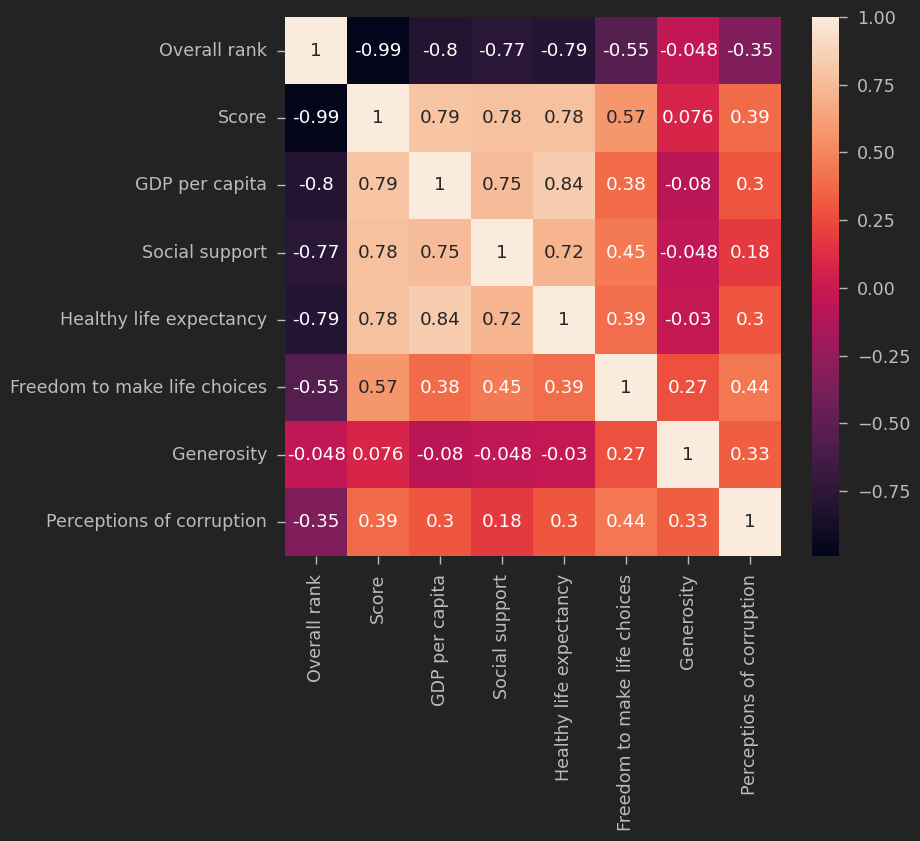

In [67]:
# Get the correlation matrix
corr_matrix = happy_df.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

MINI CHALLENGE #4 SOLUTION:
- Plot the similar type of plot for 'Healthy life expectancy' and 'Score'

In [68]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score", text = 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [ ]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Healthy life expectancy'
)
fig.show()

MINI CHALLENGE #5 SOLUTION:
- Try the same model with 4 clusters 

In [69]:
kmeans = KMeans(4)
kmeans.fit(scaled_data)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(scaled_data)

MINI CHALLENGE #6 SOLUTION:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [70]:
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Generosity', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Generosity on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})